In [1]:
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

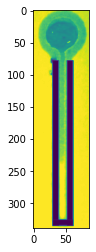

In [22]:
filename = 'design9.png'
bgr = cv2.imread(filename)
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
v = hsv[:,:,2]
gray = cv2.imread(filename, 0)
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(v)

In [18]:
ret, otsu = cv2.threshold(v,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

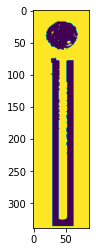

In [19]:
plt.imshow(otsu)

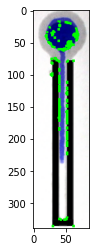

In [26]:
otsu = np.float32(otsu)
dst = cv2.cornerHarris(otsu,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img = bgr.copy()
img[dst>0.01*dst.max()]=[0,255,0]

plt.imshow(img)